# **1. Authenticate to Twitter**

In [ ]:
!pip install twitterscraper

     |████████████████████████████████| 92kB 2.9MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp37-none-any.whl size=11348 sha256=5c39544664e99a31718b2a2a7a52320df75c7b47110bb66440cb95baadb3cb7e
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper


In [ ]:
import tweepy as tw
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
from twitterscraper import query_tweets

In [ ]:
consumer_key = 'Oz7HXV4Yi1ZfvGy4DbQJhBSKP'
consumer_secret = 'KVhuyqhyIoWzbEN9wRlQMCKePEQWU8dot3Y2KL3u4Y2KPelMrl'
access_token = '1401091242985869312-fBDtNVtJoee62wTONN6oyoz1cCLMG3'
access_token_secret = 'Io2jSHy2y95rzhb2yYKyRZcbJqYoipWfxrGHngQ2HNwFe'

In [ ]:
#Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# **2. Get Tweets**

In [ ]:
BD = dt.date(2021,5,5)
ED = dt.date(2021,6,5)

tweets = query_tweets("IsraelPalestineconflict", begindate=BD, enddate=ED)
print(tweets)

[]


In [ ]:
hashtag = "#IsraelPalestineconflict"
query =  tw.Cursor(api.search, q=hashtag).items(1000)
tweets = [{'Tweets':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweets': 'Wie kent dit kind en de moeder? Meteen melden bij @politie @Jeugdzorgned en natuurlijk op school. #ISgangers… https://t.co/7J5z4yYGnN', 'Timestamp': datetime.datetime(2021, 6, 6, 15, 28, 34)}, {'Tweets': '@moetjehorentv Wie kent dit kind en de moeder? Meteen melden bij @politie @Jeugdzorgned en natuurlijk op school.… https://t.co/asVOhAZUTf', 'Timestamp': datetime.datetime(2021, 6, 6, 15, 28, 26)}, {'Tweets': 'इजराइल के नया प्रधानमंत्री नेतन्याहू से भी बड़ा शैतान है, फेलिस्तीन से शदीद करता है नफरत \n\nWatch -… https://t.co/7jJjMS1CRx', 'Timestamp': datetime.datetime(2021, 6, 6, 15, 14, 44)}, {'Tweets': 'RT @omerkelany28: Israeli forces attacking a disabled defenseless man!!\n#IsraeliTerrorism #WeStandWithPalestine #GenocideinGaza #IsraelPale…', 'Timestamp': datetime.datetime(2021, 6, 6, 14, 54, 48)}, {'Tweets': '#IsraelPalestineconflict \n#ApartheidIsrael \n#IsraelTerrorists https://t.co/bTvKR0Ofof', 'Timestamp': datetime.datetime(2021, 6, 6, 14, 47, 31)}, {'Tweets': 'RT @

In [ ]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweets,Timestamp
0,Wie kent dit kind en de moeder? Meteen melden ...,2021-06-06 15:28:34
1,@moetjehorentv Wie kent dit kind en de moeder?...,2021-06-06 15:28:26
2,इजराइल के नया प्रधानमंत्री नेतन्याहू से भी बड़...,2021-06-06 15:14:44
3,RT @omerkelany28: Israeli forces attacking a d...,2021-06-06 14:54:48
4,#IsraelPalestineconflict \n#ApartheidIsrael \n...,2021-06-06 14:47:31


In [ ]:
df.shape

(639, 2)

In [ ]:
hashtag = "#IsraelPalestineconflict"
query1 =  tw.Cursor(api.search, q=hashtag).items(1000)
tweets1 = [{'Tweets':tweet.text, 'Timestamp':tweet.created_at} for tweet in query1]
print(tweets1)

[{'Tweets': 'Wie kent dit kind en de moeder? Meteen melden bij @politie @Jeugdzorgned en natuurlijk op school. #ISgangers… https://t.co/7J5z4yYGnN', 'Timestamp': datetime.datetime(2021, 6, 6, 15, 28, 34)}, {'Tweets': '@moetjehorentv Wie kent dit kind en de moeder? Meteen melden bij @politie @Jeugdzorgned en natuurlijk op school.… https://t.co/asVOhAZUTf', 'Timestamp': datetime.datetime(2021, 6, 6, 15, 28, 26)}, {'Tweets': 'इजराइल के नया प्रधानमंत्री नेतन्याहू से भी बड़ा शैतान है, फेलिस्तीन से शदीद करता है नफरत \n\nWatch -… https://t.co/7jJjMS1CRx', 'Timestamp': datetime.datetime(2021, 6, 6, 15, 14, 44)}, {'Tweets': 'RT @omerkelany28: Israeli forces attacking a disabled defenseless man!!\n#IsraeliTerrorism #WeStandWithPalestine #GenocideinGaza #IsraelPale…', 'Timestamp': datetime.datetime(2021, 6, 6, 14, 54, 48)}, {'Tweets': '#IsraelPalestineconflict \n#ApartheidIsrael \n#IsraelTerrorists https://t.co/bTvKR0Ofof', 'Timestamp': datetime.datetime(2021, 6, 6, 14, 47, 31)}, {'Tweets': 'RT @

In [ ]:
df1 = pd.DataFrame.from_dict(tweets1)
df1.head()
df1.shape

In [ ]:
palestine_refs =['FreePalestine', 'Palestineneedhumanity', 'Palestinelivesmatter', 'IsraelApartheid', 'Palestine']
israel_refs = ['IstandwithIsrael','IsraelUnderAttack', 'FreeGazaFromHamas', 'Israel']

In [ ]:
def identify_subject(tweet, refs):
  flag = 0
  for ref in refs:
    if tweet.find(ref) !=-1:
      flag = 1
  return flag
 
df['Palestine'] = df['Tweets'].apply(lambda x: identify_subject(x, palestine_refs))
df['Israel'] = df['Tweets'].apply(lambda x: identify_subject(x, israel_refs))

In [ ]:
df[df['Israel']==1]

,Tweets,Timestamp,Palestine,Israel
0,RT @AngelBoligan: -DEFENSA CIEGA\n@El_Universa...,2021-06-06 15:19:02,1,1
1,RT @ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #is...,2021-06-06 15:18:53,1,1
2,RT @ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #is...,2021-06-06 15:16:08,1,1
4,RT @ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #is...,2021-06-06 15:05:10,1,1
5,Israel’s latest moves reveal that no lessons s...,2021-06-06 15:00:00,1,1
...,...,...,...,...
634,Mr. Ijaz (@HananIjaz9) have outlined all the h...,2021-06-04 20:23:56,1,1
635,RT @JourneyIslam: Is #Ireland changing the con...,2021-06-04 20:21:48,1,1
636,RT @FREEDOM11960336: Is #Ireland changing the ...,2021-06-04 20:20:50,1,1
637,Is #Ireland changing the consensus on #Israel-...,2021-06-04 20:15:57,1,1


In [ ]:
df[df['Palestine']==1]

,Tweets,Timestamp,Palestine,Israel
0,RT @AngelBoligan: -DEFENSA CIEGA\n@El_Universa...,2021-06-06 15:19:02,1,1
1,RT @ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #is...,2021-06-06 15:18:53,1,1
2,RT @ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #is...,2021-06-06 15:16:08,1,1
4,RT @ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #is...,2021-06-06 15:05:10,1,1
5,Israel’s latest moves reveal that no lessons s...,2021-06-06 15:00:00,1,1
...,...,...,...,...
634,Mr. Ijaz (@HananIjaz9) have outlined all the h...,2021-06-04 20:23:56,1,1
635,RT @JourneyIslam: Is #Ireland changing the con...,2021-06-04 20:21:48,1,1
636,RT @FREEDOM11960336: Is #Ireland changing the ...,2021-06-04 20:20:50,1,1
637,Is #Ireland changing the consensus on #Israel-...,2021-06-04 20:15:57,1,1


# **3. Preprocessing**

In [ ]:
#import stopwords
import nltk
from nltk.corpus import stopwords

#import textblob
from textblob import Word, TextBlob

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#IsraelPalestineconflict']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def preprocess_tweets(tweet, custom_stopwords):
     preprocessed_tweet = tweet
     preprocessed_tweet.replace('[^\w\s]', '')
     preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in stop_words)
     preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
     preprocessed_tweet = " ".join(Word(word).lemmatize() for word in preprocessed_tweet.split())
     return (preprocessed_tweet)
 
df['Processed Tweet'] = df['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweets,Timestamp,Palestine,Israel,Processed Tweet
0,RT @AngelBoligan: -DEFENSA CIEGA\n@El_Universa...,2021-06-06 15:19:02,1,1,@AngelBoligan: -DEFENSA CIEGA @El_Universal_Mx...
1,RT @ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #is...,2021-06-06 15:18:53,1,1,@ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #israé...
2,RT @ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #is...,2021-06-06 15:16:08,1,1,@ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #israé...
3,इजराइल के नया प्रधानमंत्री नेतन्याहू से भी बड़...,2021-06-06 15:14:44,0,0,इजराइल के नया प्रधानमंत्री नेतन्याहू से भी बड़...
4,RT @ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #is...,2021-06-06 15:05:10,1,1,@ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #israé...


# **4. Calculation Of Sentiments**

In [ ]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [ ]:
df.head()

,Tweets,Timestamp,Palestine,Israel,Processed Tweet,polarity,subjectivity
0,RT @AngelBoligan: -DEFENSA CIEGA\n@El_Universa...,2021-06-06 15:19:02,1,1,@AngelBoligan: -DEFENSA CIEGA @El_Universal_Mx...,0.0,0.0
1,RT @ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #is...,2021-06-06 15:18:53,1,1,@ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #israé...,0.0,0.0
2,RT @ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #is...,2021-06-06 15:16:08,1,1,@ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #israé...,0.0,0.0
3,इजराइल के नया प्रधानमंत्री नेतन्याहू से भी बड़...,2021-06-06 15:14:44,0,0,इजराइल के नया प्रधानमंत्री नेतन्याहू से भी बड़...,0.0,0.0
4,RT @ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #is...,2021-06-06 15:05:10,1,1,@ConflitsFrance: 🇮🇱🇵🇸 FLASH | La police #israé...,0.0,0.0


In [ ]:
display(df[df['Palestine']==1][['Palestine', 'polarity', 'subjectivity']].groupby('Palestine').agg([np.mean, np.max, np.min, np.median]))
display(df[df['Israel']==1][['Israel', 'polarity', 'subjectivity']].groupby('Israel').agg([np.mean, np.max, np.min, np.median]))

polarity                  subjectivity                 
               mean amax amin median         mean amax amin median
Palestine                                                         
1          0.016334  0.8 -0.8    0.0     0.090955  1.0  0.0    0.0

polarity                  subjectivity                 
            mean amax amin median         mean amax amin median
Israel                                                         
1       0.020957  0.8 -0.8    0.0     0.115656  1.0  0.0    0.0

# **5. Visualization**

In [ ]:
palestian = df[df['Palestine']==1][['Timestamp', 'polarity']]
palestian = palestian.sort_values(by= 'Timestamp', ascending = True)
palestian['MA Polarity'] = palestian.polarity.rolling(5, min_periods=3).mean()

israel = df[df['Israel']==1][['Timestamp', 'polarity']]
israel = israel.sort_values(by= 'Timestamp', ascending = True)
israel['MA Polarity'] = israel.polarity.rolling(5, min_periods=3).mean()

In [ ]:
palestian.head()

,Timestamp,polarity,MA Polarity
638,2021-06-04 20:15:47,0.0,NaN
637,2021-06-04 20:15:57,0.0,NaN
636,2021-06-04 20:20:50,0.0,0.0
635,2021-06-04 20:21:48,0.0,0.0
634,2021-06-04 20:23:56,0.0,0.0


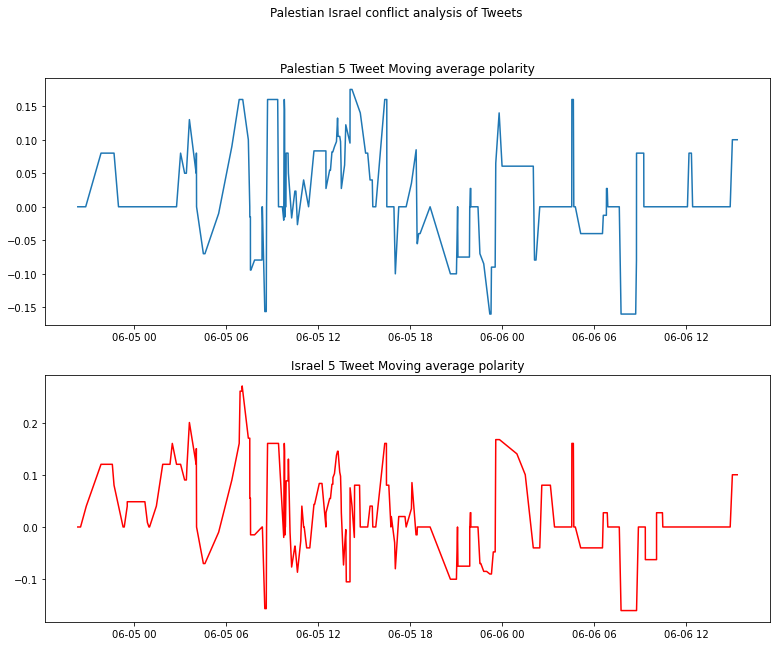

In [ ]:
fig,  axes = plt.subplots(2, 1,figsize=(13, 10))
axes[0].plot(palestian['Timestamp'], palestian['MA Polarity'])
axes[0].set_title("\n".join(['Palestian 5 Tweet Moving average polarity']))
axes[1].plot(israel['Timestamp'], israel['MA Polarity'], color = 'red')
axes[1].set_title("\n".join(['Israel 5 Tweet Moving average polarity']))
fig.suptitle('\n'.join(['Palestian Israel conflict analysis of Tweets']), y=0.98)
plt.show()

